In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import cv2
import os
import random
import skimage.io
from skimage import img_as_float
from skimage.util import random_noise
from cv2 import PSNR
from skimage.metrics import structural_similarity as ssim
import seaborn as sns
import numpy as np
from PIL import Image

ROOT_DIR = os.path.abspath(".")
ORG_IMAGE_DIR = os.path.join(ROOT_DIR, "original_images")
NOI_IMAGE_DIR = os.path.join(ROOT_DIR, "noisy_images")

In [2]:
def load_images_from_folder(folder):
    images = []
    filenames = []
    for filename in os.listdir(folder):
        img = img_as_float(imread(os.path.join(folder,filename)))
        if img is not None:
            images.append(img)
            filenames.append(filename)
    return images, filenames


original_images, original_filenames = load_images_from_folder(ORG_IMAGE_DIR)

print(f"Successfully uploaded {len(original_images)} images from directory {ORG_IMAGE_DIR}")

Successfully uploaded 100 images from directory C:\Users\szymo\Imgr\obliczeniowe_SI\Projekt\Image-Denoising\original_images


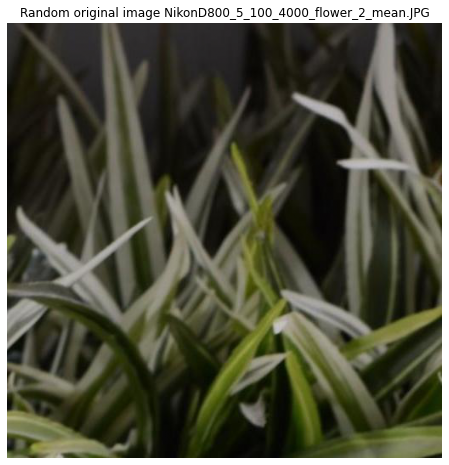

In [3]:
random_org_image = random.choice(original_images)
random_org_filename = None

for file, img in zip(original_filenames, original_images):
    if img is random_org_image:
        random_org_filename = file

#plot_img = 'all'
plot_img = 'one'

if plot_img == 'all':
    for file, img in zip(original_filenames, original_images):
        plt.figure(figsize=(8,8))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Original image {file}')
        plt.show()
else:
    plt.figure(figsize=(8,8))
    plt.imshow(random_org_image)
    plt.axis('off')
    plt.title(f'Random original image {random_org_filename}')
    plt.show() 

In [4]:
def add_gaussian_noise(image, sigma):
    noisy = skimage.util.random_noise(image, var=sigma**2) 
    return noisy

In [5]:
def save_noisy_images(filenames, images, output_dir):
    sigmas = [0.1, 0.25, 0.5, 1, 0.08, 0.06, 0.04]
    for i in range(len(sigmas)):
        for file, img in zip(filenames, images):
            noisy = add_gaussian_noise(img, sigmas[i])
            split_file = file.split(".")[0]
            if i==0:
                noisy_path = f'{output_dir}/sig01/noisy_{split_file}_sig01.JPG'
                plt.imsave(noisy_path, noisy)
            elif i==1:
                noisy_path = f'{output_dir}/sig025/noisy_{split_file}_sig025.JPG'
                plt.imsave(noisy_path, noisy)
            elif i==2:
                noisy_path = f'{output_dir}/sig05/noisy_{split_file}_sig025.JPG'
                plt.imsave(noisy_path, noisy)
            elif i==3:
                noisy_path = f'{output_dir}/sig1/noisy_{split_file}_sig1.JPG'
                plt.imsave(noisy_path, noisy)
            elif i==4:
                noisy_path = f'{output_dir}/sig008/noisy_{split_file}_sig008.JPG'
                plt.imsave(noisy_path, noisy)
            elif i==5:
                noisy_path = f'{output_dir}/sig006/noisy_{split_file}_sig006.JPG'
                plt.imsave(noisy_path, noisy)
            elif i==6:
                noisy_path = f'{output_dir}/sig004/noisy_{split_file}_sig004.JPG'
                plt.imsave(noisy_path, noisy)
               
            
save_noisy_images(original_filenames, original_images, NOI_IMAGE_DIR)

In [6]:
SIG_01_NOI_DIR = os.path.join(NOI_IMAGE_DIR, "sig01")
SIG_025_NOI_DIR = os.path.join(NOI_IMAGE_DIR, "sig025")
SIG_05_NOI_DIR = os.path.join(NOI_IMAGE_DIR, "sig025")
SIG_1_NOI_DIR = os.path.join(NOI_IMAGE_DIR, "sig1")
SIG_008_NOI_DIR = os.path.join(NOI_IMAGE_DIR, "sig008")
SIG_006_NOI_DIR = os.path.join(NOI_IMAGE_DIR, "sig006")
SIG_004_NOI_DIR = os.path.join(NOI_IMAGE_DIR, "sig004")


noisy_images_01, noisy_filenames_01 = load_images_from_folder(SIG_01_NOI_DIR)
noisy_images_025, noisy_filenames_025 = load_images_from_folder(SIG_025_NOI_DIR)
noisy_images_05, noisy_filenames_05 = load_images_from_folder(SIG_05_NOI_DIR)
noisy_images_1, noisy_filenames_1 = load_images_from_folder(SIG_1_NOI_DIR)
noisy_images_008, noisy_filenames_008 = load_images_from_folder(SIG_008_NOI_DIR)
noisy_images_006, noisy_filenames_006 = load_images_from_folder(SIG_006_NOI_DIR)
noisy_images_004, noisy_filenames_004 = load_images_from_folder(SIG_004_NOI_DIR)

print(f"Successfully uploaded {len(noisy_images_01)} images from directory {SIG_01_NOI_DIR}")
print(f"Successfully uploaded {len(noisy_images_025)} images from directory {SIG_025_NOI_DIR}")
print(f"Successfully uploaded {len(noisy_images_05)} images from directory {SIG_05_NOI_DIR}")
print(f"Successfully uploaded {len(noisy_images_1)} images from directory {SIG_1_NOI_DIR}")
print(f"Successfully uploaded {len(noisy_images_1)} images from directory {SIG_008_NOI_DIR}")
print(f"Successfully uploaded {len(noisy_images_1)} images from directory {SIG_006_NOI_DIR}")
print(f"Successfully uploaded {len(noisy_images_1)} images from directory {SIG_004_NOI_DIR}")

Successfully uploaded 100 images from directory C:\Users\szymo\Imgr\obliczeniowe_SI\Projekt\Image-Denoising\noisy_images\sig01
Successfully uploaded 100 images from directory C:\Users\szymo\Imgr\obliczeniowe_SI\Projekt\Image-Denoising\noisy_images\sig025
Successfully uploaded 100 images from directory C:\Users\szymo\Imgr\obliczeniowe_SI\Projekt\Image-Denoising\noisy_images\sig025
Successfully uploaded 100 images from directory C:\Users\szymo\Imgr\obliczeniowe_SI\Projekt\Image-Denoising\noisy_images\sig1
Successfully uploaded 100 images from directory C:\Users\szymo\Imgr\obliczeniowe_SI\Projekt\Image-Denoising\noisy_images\sig008
Successfully uploaded 100 images from directory C:\Users\szymo\Imgr\obliczeniowe_SI\Projekt\Image-Denoising\noisy_images\sig006
Successfully uploaded 100 images from directory C:\Users\szymo\Imgr\obliczeniowe_SI\Projekt\Image-Denoising\noisy_images\sig004


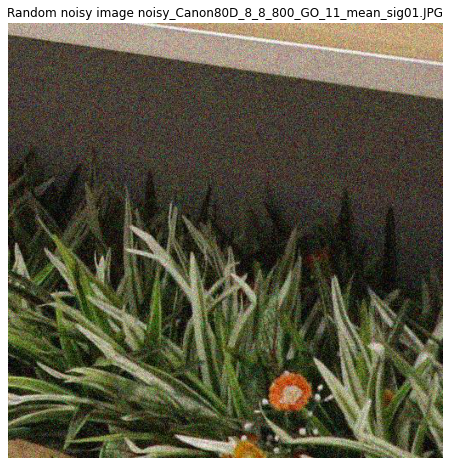

In [7]:
# Display the same random image as original
# random_noisy_image = None
# random_noisy_filename = None

# for file, img in zip(noisy_filenames_01, noisy_images_01):
#     if random_org_filename in file:
#         random_noisy_filename = file
#         random_noisy_image = img

random_noisy_image = random.choice(noisy_images_01)
random_noisy_filename = None

for file, img in zip(noisy_filenames_01, noisy_images_01):
    if img is random_noisy_image:
        random_noisy_filename = file

plot_img = 'one'
if plot_img == 'all':
    for file, img in zip(noisy_filenames_01, noisy_images_01):
        plt.figure(figsize=(8,8))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Noisy image {file}', fontdict=None, loc='center', pad=None)
        plt.show()
else:
    plt.figure(figsize=(8,8))
    plt.imshow(random_noisy_image)
    plt.axis('off')
    plt.title(f'Random noisy image {random_noisy_filename}', fontdict=None, loc='center', pad=None)
    plt.show()

In [8]:
### Calculate MSE 
import numpy as np
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

In [130]:
# Show parameters of calulacted metrics
def showStatistics(metric, value_of_sigma, results):
    avg = mean(results)
    maximum = max(results)
    minimum = min(results)
    print("Metryka", metric, "Dla wartości sigmy =",value_of_sigma, "\nMa średnią wynoszącą ", avg,
         "\nMaximum wynosi ", maximum, "\nMinimum ",minimum,"\n")


In [144]:
def showPlots(metric, results_01, results_025, results_05, results_1, results_008, results_006, results_004):
    plt.figure(figsize=(14,8))
    plt.plot(results_01, label="sigma 01", linestyle="--")
    plt.plot(results_025, label="sigma 025", linestyle="--")
    plt.plot(results_05, label="sigma 05", linestyle="--")
    plt.plot(results_1, label="sigma 1", linestyle="--")
    plt.plot(results_008, label="sigma 008",linestyle="--")
    plt.plot(results_006, label="sigma 006", linestyle='--')
    plt.plot(results_004, label="sigma 004", linestyle='--')
    plt.title(metric)
    plt.xlabel('Photo ID')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
    plt.figure(figsize=(14,8))
    plt.plot(results_01, label="sigma 01",linestyle="--")
    plt.plot(results_008, label="sigma 008",linestyle="--")
    plt.plot(results_006, label="sigma 006", linestyle='--')
    plt.plot(results_004, label="sigma 004", linestyle='--')
    plt.title(metric)
    plt.xlabel('Photo ID')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

In [134]:
## Calculate MSE

from statistics import mean
results_mse_01 = []
results_mse_025 = []
results_mse_05 = []
results_mse_1 = []
results_mse_008 = []
results_mse_006 = []
results_mse_004 = []


for i in range(100):
    result_01 = mse(original_images[i], noisy_images_01[i])
    results_mse_01.append(result_01)
    
    result_025 = mse(original_images[i], noisy_images_025[i])
    results_mse_025.append(result_025)
    
    result_05 = mse(original_images[i], noisy_images_05[i])
    results_mse_05.append(result_05)
    
    result_1 = mse(original_images[i], noisy_images_1[i])
    results_mse_1.append(result_1)
    
    result_008 = mse(original_images[i], noisy_images_008[i])
    results_mse_008.append(result_008)
    
    result_006 = mse(original_images[i], noisy_images_006[i])
    results_mse_006.append(result_006)
    
    result_004 = mse(original_images[i], noisy_images_004[i])
    results_mse_004.append(result_004)

In [140]:
showStatistics("MSE", "01", results_mse_01)
showStatistics("MSE", "025", results_mse_025)
showStatistics("MSE", "05", results_mse_05)
showStatistics("MSE", "1", results_mse_1)
showStatistics("MSE", "008", results_mse_008)
showStatistics("MSE", "006", results_mse_006)
showStatistics("MSE", "004", results_mse_004)

Metryka 01 Dla wartości sigmy = MSE 
Ma średnią wynoszącą  0.01504779566112549 
Maximum wynosi  0.01689780347120849 
Minimum  0.009939580651165568 

Metryka 025 Dla wartości sigmy = MSE 
Ma średnią wynoszącą  0.08945931327904888 
Maximum wynosi  0.10824568206188723 
Minimum  0.0670364192154535 

Metryka 05 Dla wartości sigmy = MSE 
Ma średnią wynoszącą  0.08945931327904888 
Maximum wynosi  0.10824568206188723 
Minimum  0.0670364192154535 

Metryka 1 Dla wartości sigmy = MSE 
Ma średnią wynoszącą  0.37614525952718664 
Maximum wynosi  0.4959870055307567 
Minimum  0.3025731997726423 

Metryka 008 Dla wartości sigmy = MSE 
Ma średnią wynoszącą  0.009097557320717617 
Maximum wynosi  0.010040365627571882 
Minimum  0.006046303085802336 

Metryka 006 Dla wartości sigmy = MSE 
Ma średnią wynoszącą  0.004402808656146186 
Maximum wynosi  0.004744145775794616 
Minimum  0.0029913614017144843 

Metryka 004 Dla wartości sigmy = MSE 
Ma średnią wynoszącą  0.001431657195540402 
Maximum wynosi  0.001493

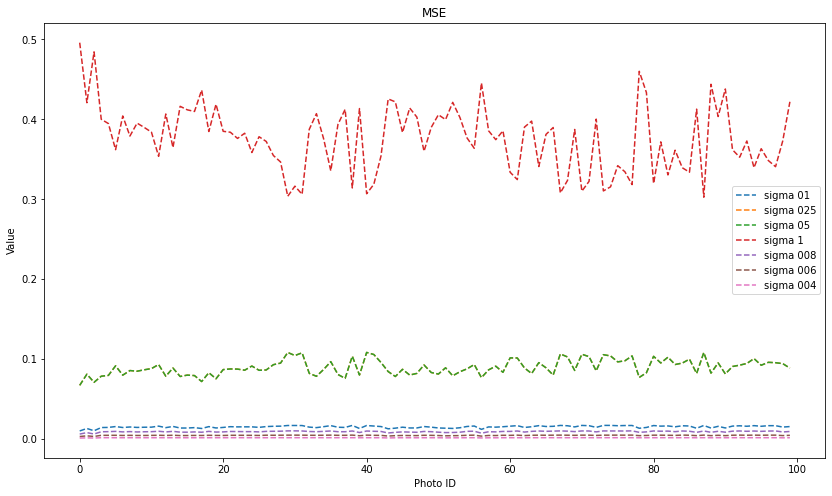

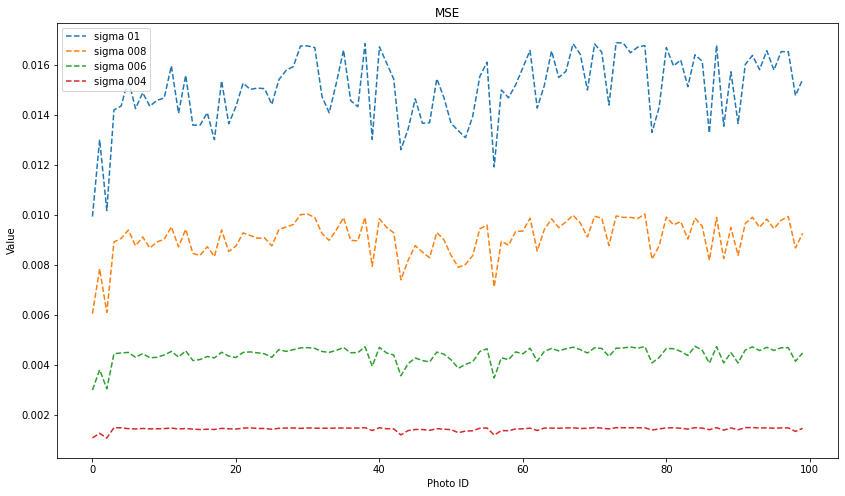

In [145]:
showPlots("MSE", results_mse_01, results_mse_025, results_mse_05, results_mse_1, results_mse_008, results_mse_006, results_mse_004)

In [141]:
## Calculate PSNR

results_psnr_01 = []
results_psnr_025 = []
results_psnr_05 = []
results_psnr_1 = []
results_psnr_008 = []
results_psnr_006 = []
results_psnr_004 = []


for i in range(100):
    result_01 = PSNR(original_images[i], noisy_images_01[i])
    results_psnr_01.append(result_01)
    
    result_025 = PSNR(original_images[i], noisy_images_025[i])
    results_psnr_025.append(result_025)
    
    result_05 = PSNR(original_images[i], noisy_images_05[i])
    results_psnr_05.append(result_05)
    
    result_1 = PSNR(original_images[i], noisy_images_1[i])
    results_psnr_1.append(result_1)
    
    result_008 = PSNR(original_images[i], noisy_images_008[i])
    results_psnr_008.append(result_008)
    
    result_006 = PSNR(original_images[i], noisy_images_006[i])
    results_psnr_006.append(result_006)
    
    result_004 = PSNR(original_images[i], noisy_images_004[i])
    results_psnr_004.append(result_004)

In [142]:
showStatistics("PSNR", "01", results_psnr_01)
showStatistics("PSNR", "025", results_psnr_025)
showStatistics("PSNR", "05", results_psnr_05)
showStatistics("PSNR", "1", results_psnr_1)
showStatistics("PSNR", "008", results_psnr_008)
showStatistics("PSNR", "006", results_psnr_006)
showStatistics("PSNR", "004", results_psnr_004)

Metryka 01 Dla wartości sigmy = PSNR 
Ma średnią wynoszącą  71.14766997413442 
Maximum wynosi  72.92833553597369 
Minimum  70.62371360816012 

Metryka 025 Dla wartości sigmy = PSNR 
Ma średnią wynoszącą  63.41090756859537 
Maximum wynosi  64.63890807407206 
Minimum  62.55791034295163 

Metryka 05 Dla wartości sigmy = PSNR 
Ma średnią wynoszącą  63.41090756859537 
Maximum wynosi  64.63890807407206 
Minimum  62.55791034295163 

Metryka 1 Dla wartości sigmy = PSNR 
Ma średnią wynoszącą  57.174546837451174 
Maximum wynosi  58.093711575524345 
Minimum  55.94731317122 

Metryka 008 Dla wartości sigmy = PSNR 
Ma średnią wynoszącą  73.33013940068922 
Maximum wynosi  75.08711702121849 
Minimum  72.88452087325834 

Metryka 006 Dla wartości sigmy = PSNR 
Ma średnią wynoszącą  76.47777204641098 
Maximum wynosi  78.14332730042477 
Minimum  76.14043590237598 

Metryka 004 Dla wartości sigmy = PSNR 
Ma średnią wynoszącą  81.35040671519727 
Maximum wynosi  82.60214491178466 
Minimum  81.15934518661133

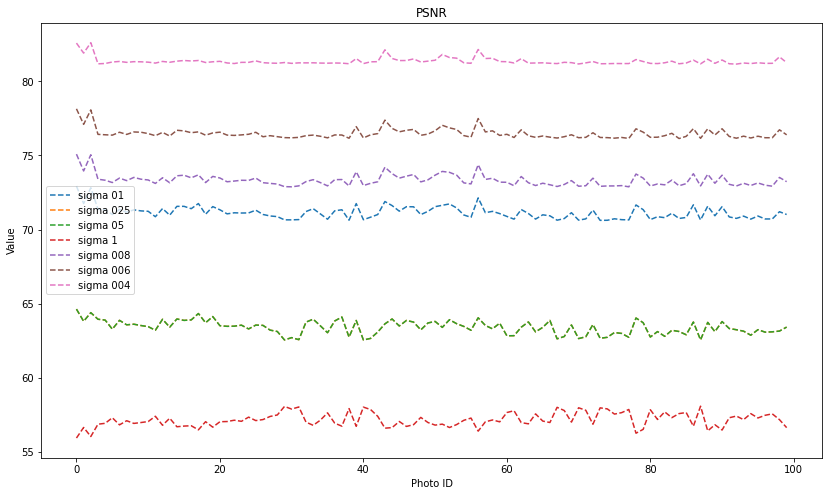

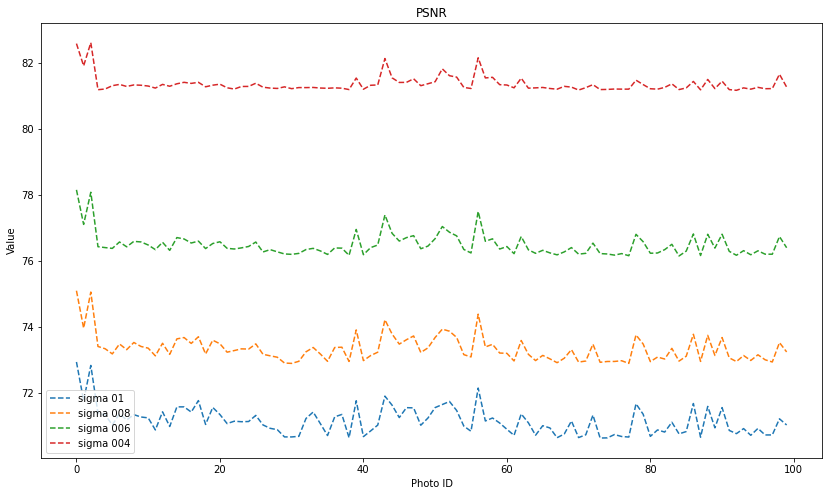

In [146]:
showPlots("PSNR", results_psnr_01, results_psnr_025, results_psnr_05, results_psnr_1, results_psnr_008, results_psnr_006, results_psnr_004)

In [147]:
## Calculate SSIM 

results_ssim_01 = []
results_ssim_025 = []
results_ssim_05 = []
results_ssim_1 = []
results_ssim_008 = []
results_ssim_006 = []
results_ssim_004 = []


for i in range(100):
    result_01 = ssim(original_images[i], noisy_images_01[i], multichannel=True)
    results_ssim_01.append(result_01)
    
    result_025 = ssim(original_images[i], noisy_images_025[i], multichannel=True)
    results_ssim_025.append(result_025)
    
    result_05 = ssim(original_images[i], noisy_images_05[i], multichannel=True)
    results_ssim_05.append(result_05)
    
    result_1 = ssim(original_images[i], noisy_images_1[i], multichannel=True)
    results_ssim_1.append(result_1)
    
    result_008 = ssim(original_images[i], noisy_images_008[i], multichannel=True)
    results_ssim_008.append(result_008)
    
    result_006 = ssim(original_images[i], noisy_images_006[i], multichannel=True)
    results_ssim_006.append(result_006)
    
    result_004 = ssim(original_images[i], noisy_images_004[i], multichannel=True)
    results_ssim_004.append(result_004)

In [148]:
showStatistics("SSIM", "01", results_ssim_01)
showStatistics("SSIM", "025", results_ssim_025)
showStatistics("SSIM", "05", results_ssim_05)
showStatistics("SSIM", "1", results_ssim_1)
showStatistics("SSIM", "008", results_ssim_008)
showStatistics("SSIM", "006", results_ssim_006)
showStatistics("SSIM", "004", results_ssim_004)

Metryka 01 Dla wartości sigmy = SSIM 
Ma średnią wynoszącą  0.49363922408654565 
Maximum wynosi  0.6274228765178831 
Minimum  0.38151934481262323 

Metryka 025 Dla wartości sigmy = SSIM 
Ma średnią wynoszącą  0.15863884694601094 
Maximum wynosi  0.27534032947097214 
Minimum  0.09909261540223434 

Metryka 05 Dla wartości sigmy = SSIM 
Ma średnią wynoszącą  0.15863884694601094 
Maximum wynosi  0.27534032947097214 
Minimum  0.09909261540223434 

Metryka 1 Dla wartości sigmy = SSIM 
Ma średnią wynoszącą  0.041008369190542515 
Maximum wynosi  0.08589646673875236 
Minimum  0.01618812884174177 

Metryka 008 Dla wartości sigmy = SSIM 
Ma średnią wynoszącą  0.6100423408315695 
Maximum wynosi  0.7244833757345094 
Minimum  0.5029145198764721 

Metryka 006 Dla wartości sigmy = SSIM 
Ma średnią wynoszącą  0.7582659090580952 
Maximum wynosi  0.8393030750467081 
Minimum  0.6686946358181247 

Metryka 004 Dla wartości sigmy = SSIM 
Ma średnią wynoszącą  0.9041672756988366 
Maximum wynosi  0.94004233918

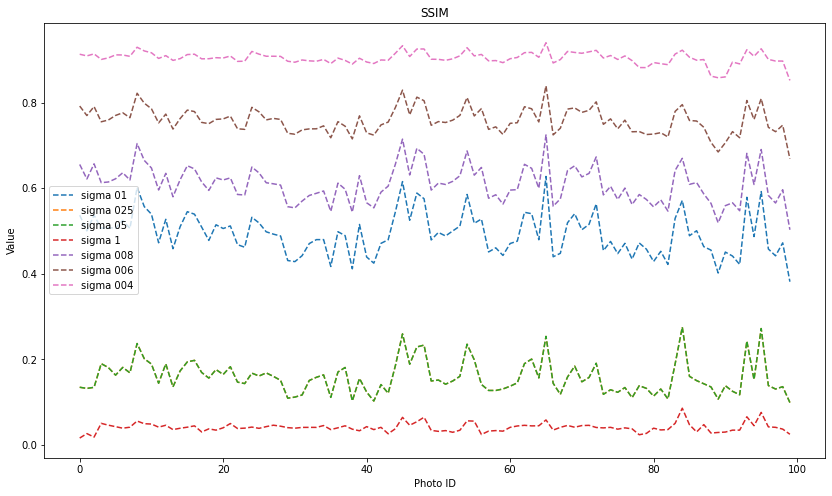

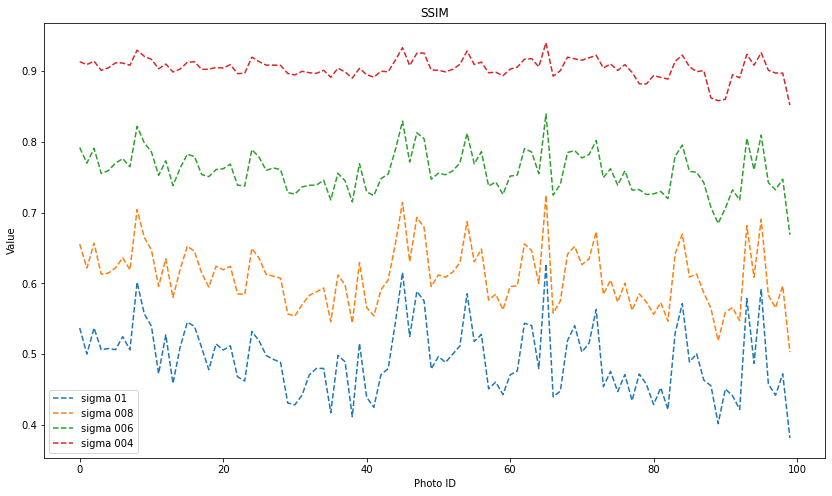

In [149]:
showPlots("SSIM", results_ssim_01, results_ssim_025, results_ssim_05, results_ssim_1, results_ssim_008, results_ssim_006, results_ssim_004)

In [12]:
def clip(img):
    img = np.minimum(np.ones(img.shape), img)
    img = np.maximum(np.zeros(img.shape), img)
    return img

In [13]:
import numpy as np
from skimage import io, util
from sklearn.feature_extraction import image
from sklearn import preprocessing
from ksvd import ApproximateKSVD

In [14]:
img = img_as_float(imread(os.path.join(SIG_01_NOI_DIR, noisy_filenames_01[1])))
patch_size = (5, 5)
patches = image.extract_patches_2d(img, patch_size)
signals = patches.reshape(patches.shape[0], -1)
mean = np.mean(signals, axis=1)[:, np.newaxis]
signals -= mean
aksvd = ApproximateKSVD(n_components=10)
dictionary = aksvd.fit(signals[:10000]).components_
gamma = aksvd.transform(signals)
reduced = gamma.dot(dictionary) + mean
reduced_img = image.reconstruct_from_patches_2d(
    reduced.reshape(patches.shape), img.shape)
io.imsave('output.png', clip(reduced_img))

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [15]:
# img_noisy = imread(os.path.join(SIG_01_NOI_DIR, noisy_filenames_01[1]))
# img_svd = imread('output.png')
# img_org = imread(os.path.join(ORG_IMAGE_DIR, original_filenames[1]))

img_noisy = Image.open(os.path.join(SIG_01_NOI_DIR, noisy_filenames_01[1]))
img_svd = Image.open('output.png')
img_org = Image.open(os.path.join(ORG_IMAGE_DIR, original_filenames[1]))

noisy_array = np.asarray(img_noisy)
img_svd = np.asarray(img_svd)
img_org = np.asarray(img_org)

result = ssim(img_org, img_svd, multichannel=True)
result

0.543436805580812

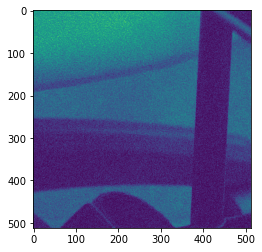

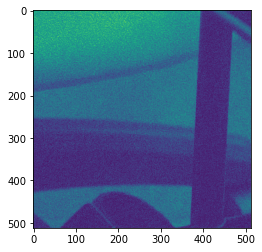

<ipython-input-21-9c59d0bdd49b>:21: UserWarning: new.png is a low contrast image
  io.imsave('new.png', img_denoised)
Lossy conversion from int32 to uint8. Range [-11, 195]. Convert image to uint8 prior to saving to suppress this warning.


In [21]:
import numpy as np
from scipy import misc

#img = Image.open(os.path.join(SIG_01_NOI_DIR, noisy_filenames_01[1]))
#u, s, vh = np.linalg.svd(img, full_matrices=False)

img = Image.open(os.path.join(SIG_01_NOI_DIR, noisy_filenames_01[1]))
X = np.mean(img, -1) # grayscale

u, s, vh = np.linalg.svd(X, full_matrices=False)
#s = np.diag(s)
plt.imshow(X)
plt.show()

s_cleaned = np.array([si if si > 250 else 0 for si in s])

img_denoised = np.array(np.dot(u * s_cleaned, vh), dtype=int)
plt.imshow(img_denoised)
plt.show()

io.imsave('new.png', img_denoised)

In [22]:
img_noisy = Image.open(os.path.join(SIG_01_NOI_DIR, noisy_filenames_01[1]))
img_svd = Image.open('new.png')
img_org = Image.open(os.path.join(ORG_IMAGE_DIR, original_filenames[1]))

noisy_array = np.asarray(img_noisy)
img_svd = np.asarray(img_svd)
img_org = np.asarray(img_org)

result = ssim(img_org, img_svd, multichannel=True)
result

ValueError: Input images must have the same dimensions.